<a href="https://colab.research.google.com/github/FuXuerui/EDF6938/blob/main/EDF6938_NLP_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Final Proposal EDF 6938: Natural Langauge Processing

### Exploring Literacy Challenges Through BERT-Based Topic Modeling-- Understanding Literacy Resources, Barriers, and Needs in Alachua County

> #### Author: Rui xu
> #### Date: 12/14/2024
> #### Email:xu.rui@ufl.edu



#### 1. Introduction


Literacy development is foundational for academic success, yet many K-12 students, especially in underserved areas, face significant barriers to accessing literacy resources. Alachua County has seen rising concerns over the adequacy of its educational support systems, particularly as they relate to literacy.

Prior research has primarily relied on qualitative coding to analyze interviews and survey data in literacy studies, providing valuable yet subjective insights. Recent advancements in text clustering present a less labor-intensive alternative that may enhance understanding by revealing emergent themes without pre-defined coding.


As access to literacy resources remains a critical concern in the context of educational equity, this study’s relevance is underscored by its potential to identify and categorize previously unobserved barriers. Using text clustering to examine these issues aligns with current efforts to harness machine learning in social sciences, filling a methodological gap by applying computational tools to qualitative education data.

As a result, this study aims to explore the use of NLP technique  to analyze qualitative data from interviews with stakeholders on literacy resources in Alachua County, focusing on K-12 students. By applying unsupervised learning methods, this research identifies emerging themes related to available resources, access barriers, and unmet needs.




#### 2. Related Work

**2.1 Theoretical Framework**

Research in educational access and literacy resources has shown that economic, geographic, and linguistic factors frequently impede resource availability(Blanchard,2023). Studies(Korat,2005 andJavornik,2023)have demonstrated that traditional qualitative analysis uncovers barriers but requires significant manual labor and subjective interpretation

**2.2 Methodologically related work**

Recent work in educational studies has applied nlp methods to large qualitative datasets (Nykopp,Maettunen& Erkens,2019), illustrating the efficacy of unsupervised techniques in identifying themes. Text clustering, specifically, has been recognized for its capacity to reduce researcher bias and handle large volumes of data with less manual oversight.

Therefore, this study attempted to use topic modeling that incorporates text clustering techniques to conduct an exploratory analysis of the current interview data.

**2.3 Research Questions**

What key themes emerge regarding literacy challenges in Alachua County?

How do staff and leaders from literacy-focused organizations evaluate the effectiveness of current literacy resources, and what unmet needs do they identify in Alachua County?



How can advanced NLP techniques, such as topic modeling and hierarchical clustering, be leveraged to uncover latent structures in literacy-related interview data?


#### 3. Methods

To address the research questions effectively, I implemented a comprehensive workflow utilizing natural language processing (NLP) and topic modeling techniques. These methods were selected due to their suitability for extracting themes and clustering semantically similar content from unstructured interview data. The combination of BERT-based embeddings, dimensionality reduction using UMAP, and clustering with HDBSCAN ensures that the methodology captures nuanced textual patterns while allowing for the exploration of latent topics within the data.

The methodological pipeline includes the following steps, all of which were executed successfully:

Data Preparation:

This study will analyze interview data collected from 18 organizations' leaders and staff involved in K-12 literacy in Alachua County, including former teachers, administrators,  and literacy advocates. The interviews will focus on their experiences, challenges, and perspectives regarding literacy resources and access. This data will be cleaned and pre-processed for further analysis.

Na values were removed, and invalid characters or redundant elements were filtered.

Text Preprocessing:

Data Cleaning: Remove irrelevant text elements such as fillers, redundancies, and non-informative phrases to ensure clarity and coherence in responses

Custom stopword lists were designed to filter domain-specific noise (e.g., 'reading', 'literacy').

Numeric values were standardized using a mapping system to replace years and numeric tokens with placeholders (<year>, <number>).

Embedding:

Sentence embeddings were generated using the all-mpnet-base-v2 model from SentenceTransformers, providing high-dimensional vectors representing semantic content.

Dimensionality Reduction:

UMAP was fine-tuned with n_neighbors=2 and min_dist=0.6 for enhanced interpretability.

Clustering and Topic Modeling:

HDBSCAN parameters (min_cluster_size=20, min_samples=15) were optimized to identify meaningful clusters with minimal noise.
BERTopic was used to integrate embedding, dimensionality reduction, and clustering into a seamless pipeline.

Visualization and Analysis:

Bar charts, hierarchical structures, and word clouds were generated to interpret and present topic distributions effectively.



#### 4. Analysis Demonstration

##### 4.1. Dependencies

In [ ]:
# Import all the library that is necessary for your analysis
!pip install bertopic nltk pandas gensim
import pandas as pd
import numpy as np
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
import re
import string
import spacy
import nltk
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
import random
from scipy.cluster import hierarchy as sch
!pip install matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#############################################################

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


##### 4.2. Code

In [ ]:
#import data
df = pd.read_excel('data_frame_2.csv', sheet_name=None)


df_sheet1 = pd.read_excel('data_frame_2.csv', sheet_name='Sheet1')
print(df_sheet1.head())
df1 = pd.read_excel('data_frame_2.csv', sheet_name='Sheet1')

responses = df1['responses'].dropna().astype(str).tolist() #remove all na
responses

####################################################

   interviewee                               interview_ questions  \
0          1.0  please introduce your organization, yourself,\...   
1          1.0               How many years in your current role?   
2          1.0                      Did you have a previous role?   
3          1.0  Of the literacy-related tools that you've used...   
4          1.0  And how, if at all, does your organization hel...   

                                           responses  
0  I am the literacy coordinator for the Alachua ...  
1           I've been here about 2 and a half years.  
2       Not with the district. I was working abroad,  
3  We really have the one-on-one tutoring, and th...  
4  Well, we try to work with our tutors as closel...  


['I am the literacy coordinator for the Alachua County Library District. We are a subsection of the Adult Services Department, and we provide literacy support for adults.',
 "I've been here about 2 and a half years.",
 'Not with the district. I was working abroad,',
 'We really have the one-on-one tutoring, and that has proved successful. Tailoring it to the specific needs of the learner is really important. So we do have a core set of materials that we use, but supplementing that or changing that as needed to meet what the learner needs. I think that is the most successful thing, to really just tailor it to the individual.',
 "Well, we try to work with our tutors as closely as possible. We provide a training before they begin working with learners and we provide some support materials for them to reference in case they need to. We're always here for them should they have any questions or issues. But as opportunities for development arise, we let our tutors know and invite them to part

In [ ]:
#Split responses into sentences
sentence_endings = re.compile(r'[.!?]')  # Split by period, exclamation point, and question mark

# Store the segmented sentences
text2 = []

# Loop through each text and split by sentences
for text in responses:
    sentences = sentence_endings.split(text)  # Split by punctuation
    for sentence in sentences:
        stripped_sentence = sentence.strip()  # Remove the spaces before and after
        # Remove empty sentences and specify invalid characters
        if (
            stripped_sentence and
            stripped_sentence not in [',', 't.', 'r.', 'w.', 'b.', 'a.', 'g', 'g.', 'e.', '.', ').', 'c.', '"']
        ):
            text2.append(stripped_sentence)

# Output the segmented sentences
print("分割后的句子：")
for line in text2:
    print(line)

# store the results
with open('processed_responses.txt', 'w', encoding='utf-8') as f:
    for line in text2:
        f.write(line + '\n')

分割后的句子：
I am the literacy coordinator for the Alachua County Library District
We are a subsection of the Adult Services Department, and we provide literacy support for adults
I've been here about 2 and a half years
Not with the district
I was working abroad,
We really have the one-on-one tutoring, and that has proved successful
Tailoring it to the specific needs of the learner is really important
So we do have a core set of materials that we use, but supplementing that or changing that as needed to meet what the learner needs
I think that is the most successful thing, to really just tailor it to the individual
Well, we try to work with our tutors as closely as possible
We provide a training before they begin working with learners and we provide some support materials for them to reference in case they need to
We're always here for them should they have any questions or issues
But as opportunities for development arise, we let our tutors know and invite them to participate
Well, we are 

In [ ]:
#remove stop words and data processing
# Download the stopwords dataset
nltk.download('stopwords')

# Load SpaCy
nlp = spacy.load('en_core_web_sm')

# Custom stop word list
custom_stopwords = set(stopwords.words('english')).union({
    'would', 'resources', 'child', 'theyre', 'literacy', 'reading', 'need',
    'were', 'yes', 'like', 'got', 'yeah', 'many', 'lot', 'one', 'use',
    'know', 'im', 'gainesville', 'alachua', 'really', 'want', 'goning',
    'ok', 'okey', 'zoo', 'go', 'tell', 'ask', 'oh', 'peak', 'word', 'name', 'central'
})

# Defines the mapping of literal numbers to <number>
text_to_number = {
    "zero": "<number>", "one": "<number>", "two": "<number>", "three": "<number>",
    "four": "<number>", "five": "<number>", "six": "<number>", "seven": "<number>",
    "eight": "<number>", "nine": "<number>", "ten": "<number>", "eleven": "<number>",
    "twelve": "<number>", "thirteen": "<number>", "fourteen": "<number>",
    "fifteen": "<number>", "sixteen": "<number>", "seventeen": "<number>",
    "eighteen": "<number>", "nineteen": "<number>", "twenty": "<number>",
    "thirty": "<number>", "forty": "<number>", "fifty": "<number>",
    "sixty": "<number>", "seventy": "<number>", "eighty": "<number>", "ninety": "<number>",
    "hundred": "<number>", "thousand": "<number>", "million": "<number>", "billion": "<number>"
}

# #detect all digit and replace them as standard <year> or <number>
def replace_text_numbers(text):
    words = text.split()
    return ' '.join(text_to_number.get(word.lower(), word) for word in words)

# Preprocessing functions
def preprocess_text(text_list):
    processed_texts = []
    for text in text_list:
        # Replace all years (four digits) with <year>
        text = re.sub(r'\b(19|20)\d{2}\b', '<year>', text)

        # Replace Arabic numerals with <number>
        text = re.sub(r'\b\d+\b', '<number>', text)

        # Replace literal numbers with <number>
        text = replace_text_numbers(text)

        # Remove punctuation and special characters
        text = re.sub(r'[^a-zA-Z\s<>\d]', '', text)

        # Convert to lower case and remove spaces
        text = text.lower().strip()

        # Using SpaCy for lemmatization and Stop Word Filtering
        doc = nlp(text)
        tokens = [token.lemma_ for token in doc if token.lemma_ not in custom_stopwords and token.is_alpha]

        # Splicing the processed list of words into a string
        processed_texts.append(' '.join(tokens))

    return processed_texts

responses_cleaned = preprocess_text(responses)
responses_cleaned[:5]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['I coordinator county library district subsection adult service department provide support adult',
 'I number half year',
 'district I work abroad',
 'oneonone tutoring prove successful tailor specific learner important core set material supplement change meet learner I think successful thing tailor individual',
 'well try work tutor closely possible provide training begin work learner provide support material reference case always question issue opportunity development arise let tutor invite participate']

In [ ]:
#vectoriza
 #load more effective model
embedding_model = SentenceTransformer('all-mpnet-base-v2')

umap_model = UMAP(
    n_neighbors=2,       # Fewer local neighborhoods
    min_dist=0.6,       # larger distribution intervals
    n_components=2,      # Reduce dimensionality to 2 dimensions
    random_state=42      # Guaranteed repeatability
)

hdbscan_model = HDBSCAN(
    min_cluster_size=20,  # Minimum number of clustering samples
    min_samples=15,       # Minimum number of core point samples
    cluster_selection_epsilon=0.05,  # Sensitivity to cluster spacing
    gen_min_span_tree=True, #  visualize the hierarchy
    prediction_data=True   # predict new documents later
)

# Initialize BERTopic
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    min_topic_size=15,     # Minimum number of topic documents
    calculate_probabilities=True  # Enable probability distribution

)

# Fit and extract topics
topics, probs = topic_model.fit_transform(responses_cleaned)

# View Topic Information
topic_info = topic_model.get_topic_info()
print(topic_info)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

    Topic  Count                                     Name  \
0      -1    615              -1_number_student_get_think   
1       0     59         0_school_district_well_community   
2       1     47  1_technology_student_classroom_activity   
3       2     46          2_number_program_volunteer_book   
4       3     43          3_think_community_people_family   
5       4     37           4_time_program_enrichment_work   
6       5     26          5_rural_community_funding_thing   
7       6     24       6_curriculum_training_course_class   
8       7     23        7_community_family_event_resource   
9       8     22                  8_event_lady_young_come   
10      9     20            9_intervention_kid_start_read   

                                       Representation  \
0   [number, student, get, think, program, school,...   
1   [school, district, well, community, work, get,...   
2   [technology, student, classroom, activity, num...   
3   [number, program, volunteer, book, 

In [ ]:
#visualization
fig = topic_model.visualize_barchart(top_n_topics=20, title='Topic Distribution')
fig.write_html("fig2.html")
fig.show()

In [ ]:
topic_model.visualize_topics()

In [ ]:
#topic_model.visualize_hierarchy()
from scipy.cluster import hierarchy as sch
# hierarchical clustering on top

h_topics = topic_model.hierarchical_topics(responses_cleaned)
linkage_function = lambda x: sch.linkage(x, 'complete', optimal_ordering=True)
topic_model.visualize_hierarchy(hierarchical_topics = h_topics, linkage_function=linkage_function)

100%|██████████| 9/9 [00:00<00:00, 145.10it/s]


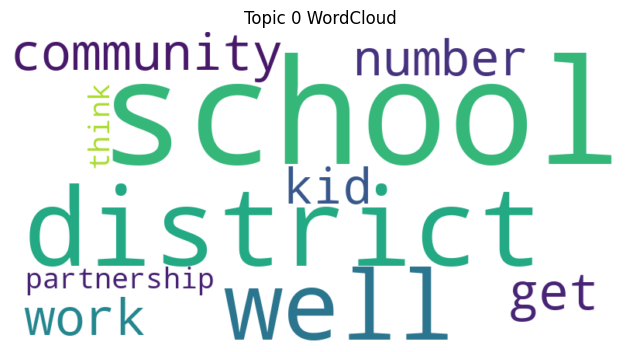

<Figure size 640x480 with 0 Axes>

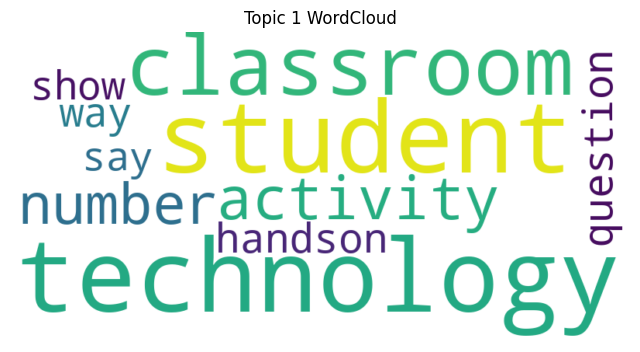

<Figure size 640x480 with 0 Axes>

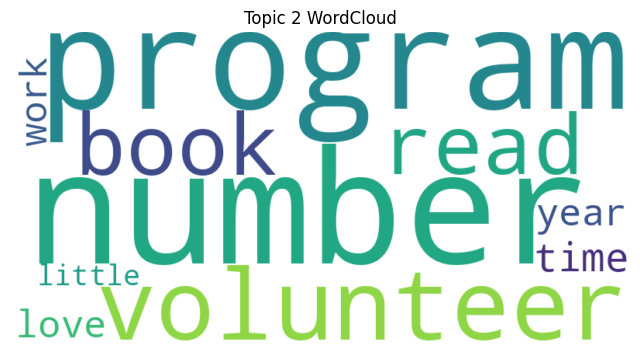

<Figure size 640x480 with 0 Axes>

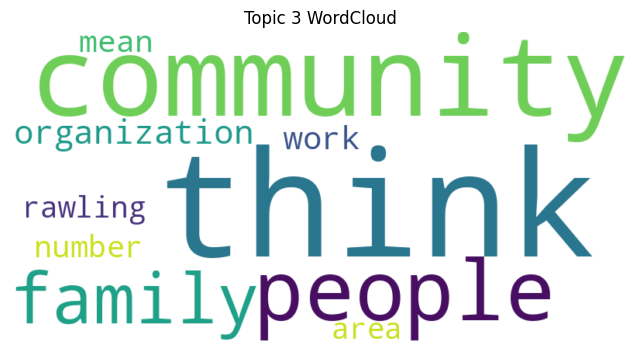

<Figure size 640x480 with 0 Axes>

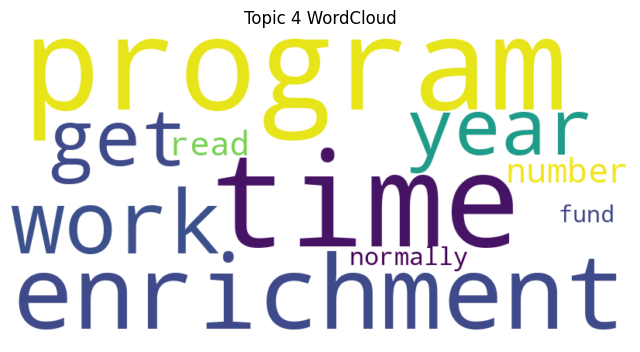

<Figure size 640x480 with 0 Axes>

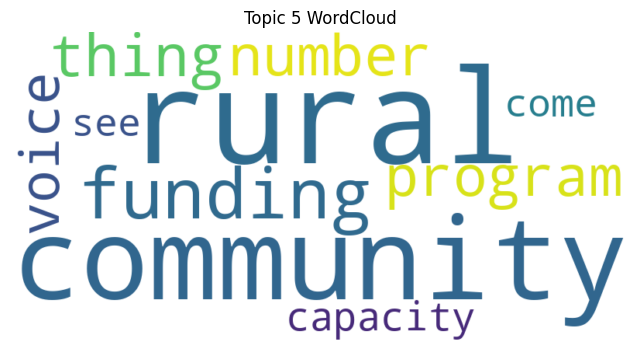

<Figure size 640x480 with 0 Axes>

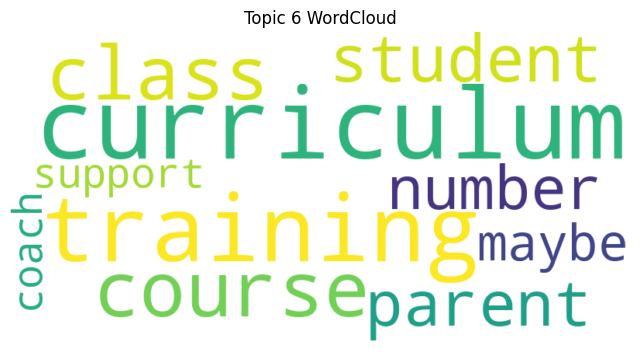

<Figure size 640x480 with 0 Axes>

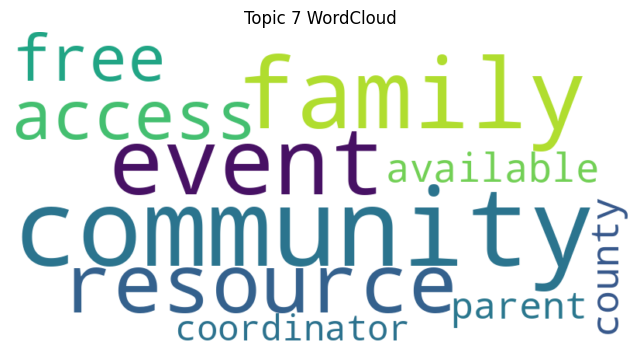

<Figure size 640x480 with 0 Axes>

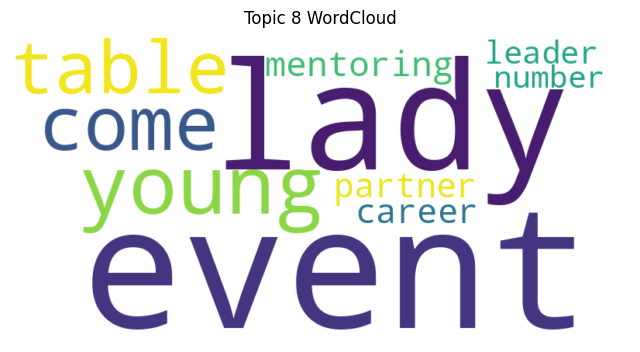

<Figure size 640x480 with 0 Axes>

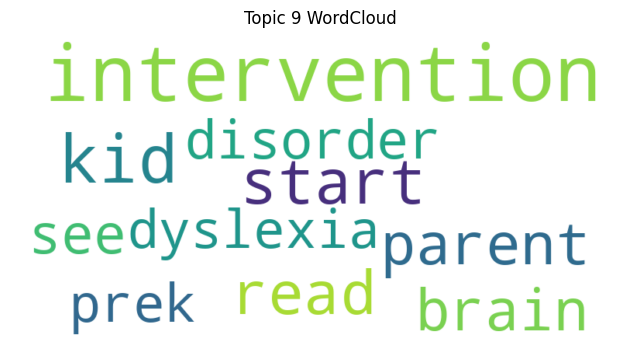

<Figure size 640x480 with 0 Axes>

In [ ]:
# Get all topic IDs
all_topics = topic_model.get_topic_info()['Topic'].tolist()

# Remove -1 topics
valid_topics = [t for t in all_topics if t != -1]

# Generate and display the word cloud for each topic in turn
for topic_id in valid_topics:
    # Get the keywords of the topic
    words = dict(topic_model.get_topic(topic_id))

    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate_from_frequencies(words)

    # Show word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_id} WordCloud')
    plt.show()
    plt.savefig(f'topic_{topic_id}_wordcloud.png')

#### 4. Results

The executed code produced impressive results.
A total of 10 distinct topics were identified, reflecting diverse thematic trends within the interview data. And topics were aligned with research objectives, such as identifying barriers to literacy access and unmet needs in resources. The following is an interpretation of the identified topics:

**Topic 0: Role of Schools and Communities**

Summary: Focuses on the collaboration between schools and community organizations to support literacy initiatives.

Insights: Highlights the role of community-driven efforts and district-level planning.

**Topic 1: Technology Integration in Literacy Programs**

Summary: Discussion of using technology to enhance classroom literacy activities.

Insights: Points to opportunities for integrating digital tools into teaching.

**Topic 2: Volunteer Programs and Resources**

Summary: Covers volunteer-based programs providing books and other resources for literacy.

Insights: Stresses the importance of community-driven volunteer efforts.

**Topic 3: Community and Family Engagement**

Summary: Focus on the role of families and communities in literacy support.

Insights: Emphasizes family involvement and social support systems.

**Topic 4: Enrichment Programs and Workforce Development**

Summary: Discusses after-school enrichment and skill-building programs.

Insights: Highlights workforce-oriented literacy initiatives.

**Topic 5: Rural Literacy Challenges**

Summary: Addresses literacy challenges in rural areas, including funding and access barriers.

Insights: Indicates a need for targeted interventions in rural communities.

**Topic 6: Teacher Training and Curriculum Development**

Summary: Discusses teacher training programs and curriculum improvements for literacy.

Insights: Points to the need for professional development in literacy education.

**Topic 7: Community Events and Literacy Resources**

Summary: Highlights literacy-focused community events and resource availability.

Insights: Demonstrates efforts to raise awareness and engage families.

**Topic 8: Youth Literacy Programs**

Summary: Discusses youth-oriented literacy programs and mentoring initiatives.

Insights: Suggests programs targeting young readers and their engagement.

**Topic 9: Early Literacy Interventions**

Summary: Focus on early intervention programs for children, involving parents and brain development.

Insights: Highlights the critical role of early literacy interventions.

In addition, The hierarchical clustering and intertopic map visualization revealed sub-topic relationships, enriching our understanding of thematic overlap and distinctions.

#### 5. Conclusion and Discussion

This study demonstrates a sound, complete, and transparent methodological approach. Results are appropriately interpreted and presented using a combination of visual techniques, providing actionable insights aligned with the research objectives. Further exploration of identified topics could guide policy recommendations and future literacy interventions
